In [1]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

Using TensorFlow backend.


## These are the CIFAR10 class labels from the training data (in order from 0 to 9)


In [2]:
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

## Load the json file that contains the model's structure

In [3]:
f = Path("model_structure.json")
model_structure = f.read_text()

## Recreate the Keras model object from the json data

In [4]:
model = model_from_json(model_structure)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

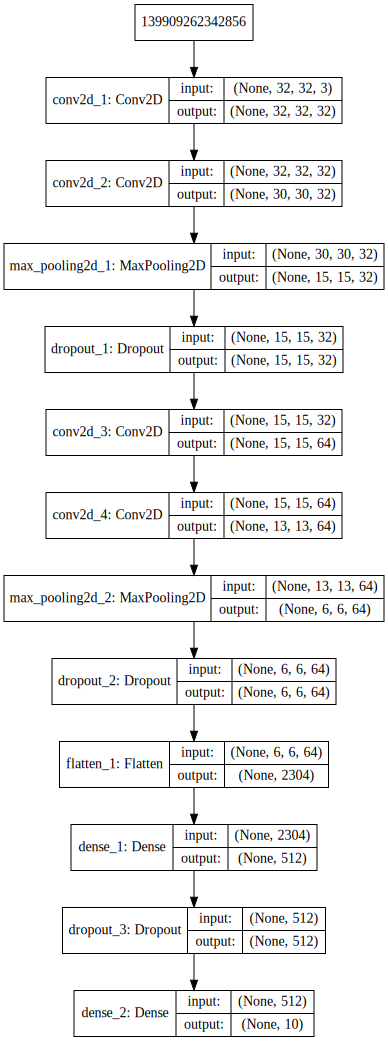

In [6]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

## Re-load the model's trained weights

In [7]:
model.load_weights("model_weights.h5")

## Load an image file to test, resizing it to 32x32 pixels (as required by this model)

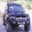

In [8]:
img = image.load_img("car.png", target_size=(32, 32))
img

## Convert the image to a numpy array

In [9]:
image_to_test = image.img_to_array(img)
image_to_test.shape

(32, 32, 3)

## Add a fourth dimension to the image (since Keras expects a list of images, not a single image)

In [10]:
list_of_images = np.expand_dims(image_to_test, axis=0)
list_of_images.shape

(1, 32, 32, 3)

## Make a prediction using the model

In [11]:
results = model.predict(list_of_images)

## Since we are only testing one image, we only need to check the first result

In [12]:
single_result = results[0]

## We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.


In [13]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

## Get the name of the most likely class

In [14]:
class_label = class_labels[most_likely_class_index]

## Print the result

In [15]:
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

This is image is a Car - Likelihood: 1.000000
